In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
mnist_train = pd.read_csv("...\mnist_train.csv")
mnist_test = pd.read_csv("...\mnist_test.csv")

mTL = mnist_train['label']
mTD = mnist_train.drop('label', axis = 1)

mEL = mnist_test['label']
mED = mnist_test.drop('label', axis = 1)

In [ ]:
print(mTD.shape)

(60000, 784)


In [ ]:
print(mTD.head(5))

   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1    0    0    0    0    0    0    0    0    0     0  ...      0      0   
2    0    0    0    0    0    0    0    0    0     0  ...      0      0   
3    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4    0    0    0    0    0    0    0    0    0     0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 784 columns]


In [ ]:
def img_format(img):
    c = 0
    imgFor = [[0 for x in range(28)] for y in range(28)] 
            
    for i in range(28):
        for j in range(28):
            imgFor[i][j] = img[c]
            c += 1
            
    return np.array(imgFor)

(28, 28)


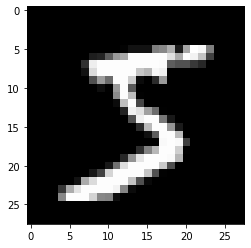

In [ ]:
test_img = mTD.iloc[0]
label = mTL.iloc[0]
img = np.array(img_format(test_img))
print(img.shape)
plt.figure(figsize=(20,4))
plt.imshow(img, cmap = plt.cm.gray)

In [ ]:
def img_split(img, windowRow, windowCol):
    
    imgWin = []
    
    maxRLen = img.shape[0]
    maxCLen = img.shape[1]
    
    loopRLen = maxRLen - windowRow
    loopCLen = maxCLen - windowCol
    
    for r in range(0, loopRLen, windowRow):
        for c in range(0, loopCLen, windowCol):
            win = img[r:windowRow + r, c:windowCol + c]
            imgWin.append(win)
    
    return np.array(imgWin)

In [ ]:
splited_img = img_split(img, 8, 8)
print(splited_img.shape)

(9, 8, 8)


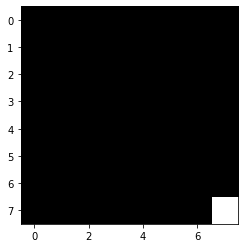

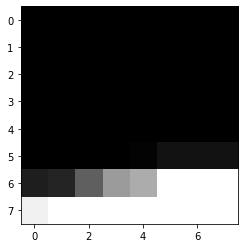

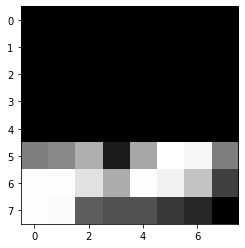

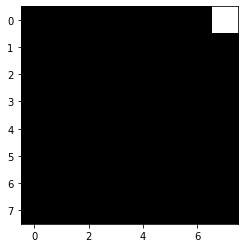

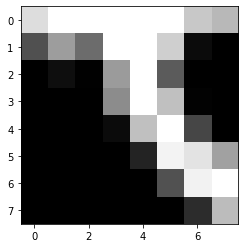

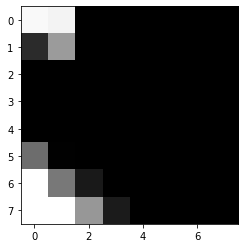

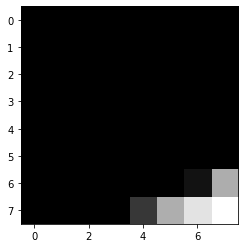

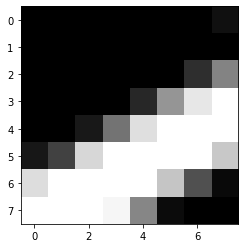

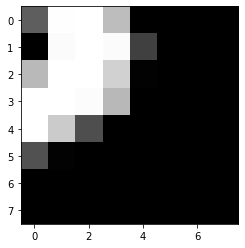

In [ ]:
for w in splited_img:
    plt.figure(figsize = (20,4))
    plt.imshow(w, cmap = plt.cm.gray)

In [ ]:
print(splited_img[0])

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 49]]


In [ ]:
def get_central(list):
    fea_vec = []
    for w in list:
        sum = 0
        x = 0
        y = 0
        wR = w.shape[0]
        wC = w.shape[1]
        for i in range(wR):
            for j in range(wC):
                sum += w[i][j]
        for i in range(wR):
            for j in range(wC):
                x += i * w[i][j]
                y += j * w[i][j]
        if(sum == 0):
            fea_vec.append(0)
            fea_vec.append(0)
        else:
            xC = x / sum
            yC = y / sum
            fea_vec.append(xC)
            fea_vec.append(yC)
    return np.array(fea_vec)
        

In [ ]:
fea = get_central(splited_img)

In [ ]:
print(fea.shape)
print(fea)

(18,)
[7.         7.         6.58990632 4.03142943 5.89339698 3.03845134
 0.         7.         2.37788861 4.20631754 4.21824973 0.6398079
 6.78882682 6.15865922 5.12107915 3.85584268 1.96692175 1.51147865]


In [ ]:
def get_Feature(data):
    dataLen = data.shape[0]
    imgF = []
    splited = []
    feature_vec = []
    for i in range(dataLen):
        img = data.iloc[i]
        fImg = img_format(img)
        imgF.append(fImg)
    for i in imgF:
        splited.append(img_split(i, 8, 8))
    for i in splited:
        feature_vec.append(get_central(i))
    return np.array(feature_vec)

In [ ]:
fea_train = get_Feature(mTD.iloc[:30000])
fea_test = get_Feature(mED)

In [ ]:
print(fea_train[0])

[7.         7.         6.58990632 4.03142943 5.89339698 3.03845134
 0.         7.         2.37788861 4.20631754 4.21824973 0.6398079
 6.78882682 6.15865922 5.12107915 3.85584268 1.96692175 1.51147865]


In [ ]:
print(fea_train.shape)
print(fea_test.shape)

(30000, 18)
(10000, 18)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_cls = KNeighborsClassifier()
parameters = {'n_neighbors':[5,7,9,11,15], 'p':[1, 2]}# p=1 for hamming distance and p=2 for Euclidean distance
grd_search = GridSearchCV(knn_cls, parameters, cv=5, scoring='accuracy', n_jobs=6)
grd_search.fit(fea_train, mTL.iloc[:30000])
print(f"The best params found are {grd_search.best_params_}")
print(f"The best achieved validation accuracy is {grd_search.best_score_}")
test_acc = grd_search.score(fea_test, mEL)
print(f"The test accuracy is {test_acc}")

The best params found are {'n_neighbors': 5, 'p': 1}
The best achieved validation accuracy is 0.9118666666666666
The test accuracy is 0.9183
